In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [0]:
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
search_url = 'https://www.booking.com/searchresults.en-gb.html?label=gen173rf-1FCAEoggI46AdIM1gDaKEBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBogINb2N0b3BhcnNlLmNvbagCA7gCrOv27wXAAgE&lang=en-gb&sid=f0fdfa3b4e62de71fafbb1bb88e80594&sb=1&src=searchresults&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.en-gb.html%3Flabel%3Dgen173rf-1FCAEoggI46AdIM1gDaKEBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBogINb2N0b3BhcnNlLmNvbagCA7gCrOv27wXAAgE%3Bsid%3Df0fdfa3b4e62de71fafbb1bb88e80594%3Btmpl%3Dsearchresults%3Bac_click_type%3Db%3Bac_position%3D0%3Bcity%3D-2401743%3Bclass_interval%3D1%3Bdest_id%3D-2403010%3Bdest_type%3Dcity%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D1%3Bgroup_children%3D0%3Biata%3DKUL%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bno_rooms%3D1%3Boffset%3D0%3Bpostcard%3D0%3Braw_dest_type%3Dcity%3Broom1%3DA%3Bsb_price_type%3Dtotal%3Bsearch_selected%3D1%3Bshw_aparth%3D1%3Bslp_r_match%3D0%3Bsrc%3Dsearchresults%3Bsrc_elem%3Dsb%3Bsrpvid%3Dab192ad4979400f7%3Bss%3DKuala%2520Lumpur%252C%2520Kuala%2520Lumpur%2520Federal%2520Territory%252C%2520Malaysia%3Bss_all%3D0%3Bss_raw%3Dkua%3Bssb%3Dempty%3Bsshis%3D0%3Bssne%3DKota%2520Bharu%3Bssne_untouched%3DKota%2520Bharu%3Btop_ufis%3D1%26%3B&sr_autoscroll=1&ss=Kuala+Lumpur&is_ski_area=0&ssne=Kuala+Lumpur&ssne_untouched=Kuala+Lumpur&city=-2403010&checkin_year=2020&checkin_month=1&checkin_monthday=1&checkout_year=2020&checkout_month=1&checkout_monthday=2&group_adults=1&group_children=0&no_rooms=1&from_sf=1'
response = requests.get(search_url)
page = requests.get(search_url,headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

Data Cleaning - Price

In [0]:
Image = []
Name = []
URL = []
Score = []
Reviews = []
data = []

In [0]:
count=0
page_num=25
while(True):
  if(count==41):
    break
  count+=1
  if response.status_code == requests.codes.ok:
    bs = BeautifulSoup(response.text, 'html.parser')
    # Fetching all items
    list_all_h = bs.findAll('div', class_='sr_item')
  
    print(len(list_all_h))
    try:
      for h in list_all_h:
        print("HA")
    # Getting the Name attribute
        image = h.find('img', class_='hotel_image')['src']
        print(image)
        name = h.find("span", class_="sr-hotel__name").text[1:-1].upper() #Convert the hotel name into uppercase
        print(name)
        url1 = h.find('h3').find('a')['href']
        base_url = 'https://www.booking.com'
        url1 = base_url + url1
        score=h.find("div", class_='bui-review-score__badge').text
        print(score)
        reviews=h.find("div",class_='bui-review-score__title').text
        print(reviews)
        Image.append(image if image else '')
        Name.append(name if name else '')
        URL.append(url1 if url1 else '')
        Score.append(score if score else '')
        Reviews.append(reviews if reviews else '')
    except:
      count=count
    link = bs.find("ul",class_="bui-pagination__list")
    for a in link.findAll('a'):
      link = a.get("href")
    response = requests.get(link)
    df_data = pd.DataFrame({'Names':Name,'Reviews':Reviews,'Score':Score,'Image':Image})
    print(df_data)
    print(link)
    page_num+=25

25
HA
https://q-cf.bstatic.com/xdata/images/hotel/square200/167943993.jpg?k=9d49c8fbb72d7bb2973a660d06c04c7d8f171d6c157edec405aaf6e605f9bc93&o=
SMART BOUTIQUE HOTEL (BUKIT BINTANG)
 6.1 
 Review score 
HA
https://r-cf.bstatic.com/xdata/images/hotel/square200/232349093.jpg?k=981d4676b470d001eb6b5879709c6fd58b3f83d1a27a960e490116574685ef33&o=
CHARISMA HOTEL BUKIT BINTANG
 7.1 
 Good 
HA
https://r-cf.bstatic.com/xdata/images/hotel/square200/59608204.jpg?k=8982ec4b5a6aa9349a4d3fa92f0da2bb594925a906f7c8147911578a01951200&o=
SILKA CHERAS KUALA LUMPUR
 7.9 
 Good 
HA
https://q-cf.bstatic.com/xdata/images/hotel/square200/205962200.jpg?k=bc3220f8cc37c488c87f1023215d9d99912a153348afff1d7a8feeab816cedca&o=
CAPITAL O 978 MIDARIS HOTEL
 7.7 
 Good 
HA
https://q-cf.bstatic.com/xdata/images/hotel/square200/82971052.jpg?k=0c9f8769e4c4639a10d1504c2c38003f26638b1ac0ad4178e06a0133e6869e4c&o=
HOTEL PUDU PLAZA KUALA LUMPUR
 7.8 
 Good 
HA
https://q-cf.bstatic.com/xdata/images/hotel/square200/178841676.jpg?

In [0]:
Price = []
room_count = 0
page_count = 0

search_url = 'https://www.booking.com/searchresults.en-gb.html?label=gen173rf-1FCAEoggI46AdIM1gDaKEBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBogINb2N0b3BhcnNlLmNvbagCA7gCrOv27wXAAgE&lang=en-gb&sid=f0fdfa3b4e62de71fafbb1bb88e80594&sb=1&src=searchresults&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.en-gb.html%3Flabel%3Dgen173rf-1FCAEoggI46AdIM1gDaKEBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBogINb2N0b3BhcnNlLmNvbagCA7gCrOv27wXAAgE%3Bsid%3Df0fdfa3b4e62de71fafbb1bb88e80594%3Btmpl%3Dsearchresults%3Bac_click_type%3Db%3Bac_position%3D0%3Bcity%3D-2401743%3Bclass_interval%3D1%3Bdest_id%3D-2403010%3Bdest_type%3Dcity%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D1%3Bgroup_children%3D0%3Biata%3DKUL%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bno_rooms%3D1%3Boffset%3D0%3Bpostcard%3D0%3Braw_dest_type%3Dcity%3Broom1%3DA%3Bsb_price_type%3Dtotal%3Bsearch_selected%3D1%3Bshw_aparth%3D1%3Bslp_r_match%3D0%3Bsrc%3Dsearchresults%3Bsrc_elem%3Dsb%3Bsrpvid%3Dab192ad4979400f7%3Bss%3DKuala%2520Lumpur%252C%2520Kuala%2520Lumpur%2520Federal%2520Territory%252C%2520Malaysia%3Bss_all%3D0%3Bss_raw%3Dkua%3Bssb%3Dempty%3Bsshis%3D0%3Bssne%3DKota%2520Bharu%3Bssne_untouched%3DKota%2520Bharu%3Btop_ufis%3D1%26%3B&sr_autoscroll=1&ss=Kuala+Lumpur&is_ski_area=0&ssne=Kuala+Lumpur&ssne_untouched=Kuala+Lumpur&city=-2403010&checkin_year=2020&checkin_month=1&checkin_monthday=1&checkout_year=2020&checkout_month=1&checkout_monthday=2&group_adults=1&group_children=0&no_rooms=1&from_sf=1'

while(True):
  headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
  response = requests.get(search_url,allow_redirects=False, headers=headers)
  data = response.text
  soup = BeautifulSoup(data, 'html.parser')

  room_list = soup.findAll('div',{'class': 'bui-price-display__value'})
  print(room_list)
  page_count += 1
  
  
  # Getting the price attribute
  for room in room_list:
    room_count += 1
    price = room.text      
    print(price)
    Price.append(price)
  
  print(page_count)
  print(room_count)

  
  url_tag = soup.find('a', {"title": "Next page"})
  try:
    if url_tag == "None":
      break
    elif url_tag.get('href'):
      search_url = "https://www.booking.com" + url_tag.get('href')
      print(search_url)
  except:
    break 

print(Price)

df_price = pd.DataFrame(Price, columns=['Price'])

[<div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$69
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$93
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$31
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$71
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$44
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$45
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$46
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$36
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-block-maker-helper">
US$10
</div>, <div aria-hidden="true" class="bui-price-display__value prco-inline-bloc

In [0]:
df_frame =df_data.join(df_price['Price'])
df_frame['Price'] = df_frame['Price'].replace('\n',' ', regex=True) #remove the \n character
print(df_frame)
print(df_frame['Price'])

                                    Names  ...    Price
0    SMART BOUTIQUE HOTEL (BUKIT BINTANG)  ...   US$69 
1            CHARISMA HOTEL BUKIT BINTANG  ...   US$93 
2               SILKA CHERAS KUALA LUMPUR  ...   US$31 
3             CAPITAL O 978 MIDARIS HOTEL  ...   US$71 
4           HOTEL PUDU PLAZA KUALA LUMPUR  ...   US$44 
..                                    ...  ...      ...
413        PLATINUM SUITES @ SWISS GARDEN  ...      NaN
414       HOTEL PUDU BINTANG KUALA LUMPUR  ...      NaN
415               VORTEX BY PNUT HOMESTAY  ...      NaN
416                     OSCAR GUEST HOUSE  ...      NaN
417                     OSCAR GUEST HOUSE  ...      NaN

[418 rows x 5 columns]
0       US$69 
1       US$93 
2       US$31 
3       US$71 
4       US$44 
        ...   
413        NaN
414        NaN
415        NaN
416        NaN
417        NaN
Name: Price, Length: 418, dtype: object


In [0]:
df_frame['Price'] = df_frame['Price'].str.extract(r'(\d+.+$)')#remove the character US$ of the price
df_frame['Price'] = df_frame['Price'].astype(float) #change the datatype of price into float

#currency conversion function
def convert_to_rm(amount): 
    rates = 4.14
    return rates*amount

df_frame['Price (RM)'] = df_frame['Price'].apply(convert_to_rm)
df_frame['Price (RM)'] = df_frame['Price (RM)'].apply(lambda x:round(x,2))
df_currency = pd.DataFrame([df_frame['Price'],df_frame['Price (RM)']]).transpose()
df_currency

,Price,Price (RM)
0,69.0,285.66
1,93.0,385.02
2,31.0,128.34
3,71.0,293.94
4,44.0,182.16
...,...,...
413,NaN,NaN
414,NaN,NaN
415,NaN,NaN
416,NaN,NaN


In [0]:
df_new =df_data.join(df_frame['Price (RM)'])

print(df_new)

                                    Names  ... Price (RM)
0    SMART BOUTIQUE HOTEL (BUKIT BINTANG)  ...     285.66
1            CHARISMA HOTEL BUKIT BINTANG  ...     385.02
2               SILKA CHERAS KUALA LUMPUR  ...     128.34
3             CAPITAL O 978 MIDARIS HOTEL  ...     293.94
4           HOTEL PUDU PLAZA KUALA LUMPUR  ...     182.16
..                                    ...  ...        ...
413        PLATINUM SUITES @ SWISS GARDEN  ...        NaN
414       HOTEL PUDU BINTANG KUALA LUMPUR  ...        NaN
415               VORTEX BY PNUT HOMESTAY  ...        NaN
416                     OSCAR GUEST HOUSE  ...        NaN
417                     OSCAR GUEST HOUSE  ...        NaN

[418 rows x 5 columns]


In [0]:
#combine the column of Reviews and Score
df_data['combine']=df_frame['Reviews']+"="+df_frame['Score']

df_data['combine']

0       Review score = 6.1 
1               Good = 7.1 
2               Good = 7.9 
3               Good = 7.7 
4               Good = 7.8 
               ...         
413             Good = 7.9 
414             Good = 7.9 
415             Good = 7.8 
416     Review score = 6.4 
417     Review score = 6.4 
Name: combine, Length: 418, dtype: object

In [0]:
df_latest = pd.DataFrame({'Names':df_new['Names'],'Reviews with score':df_data['combine'],'Image':df_new['Image'],'Price':df_new['Price (RM)']})
print(df_latest)

                                    Names  ...   Price
0    SMART BOUTIQUE HOTEL (BUKIT BINTANG)  ...  285.66
1            CHARISMA HOTEL BUKIT BINTANG  ...  385.02
2               SILKA CHERAS KUALA LUMPUR  ...  128.34
3             CAPITAL O 978 MIDARIS HOTEL  ...  293.94
4           HOTEL PUDU PLAZA KUALA LUMPUR  ...  182.16
..                                    ...  ...     ...
413        PLATINUM SUITES @ SWISS GARDEN  ...     NaN
414       HOTEL PUDU BINTANG KUALA LUMPUR  ...     NaN
415               VORTEX BY PNUT HOMESTAY  ...     NaN
416                     OSCAR GUEST HOUSE  ...     NaN
417                     OSCAR GUEST HOUSE  ...     NaN

[418 rows x 4 columns]


In [0]:
df_latest.to_csv("New Clean Data")

Data Visualization

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


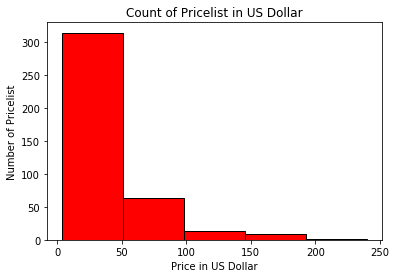

In [0]:
import matplotlib.pyplot as plt
#price before data cleaning
plt.hist(df_frame['Price'],
         facecolor = 'red',
         edgecolor = 'black',
         bins = 5
         )
plt.title('Count of Pricelist in US Dollar')
plt.xlabel('Price in US Dollar')
plt.ylabel('Number of Pricelist')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


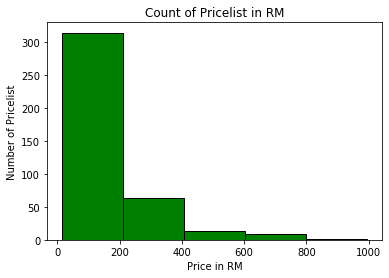

In [0]:
#price after data cleaning
plt.hist(df_new['Price (RM)'],facecolor = 'green',edgecolor = 'black',bins = 5)
plt.title('Count of Pricelist in RM')
plt.xlabel('Price in RM')
plt.ylabel('Number of Pricelist')
plt.show()

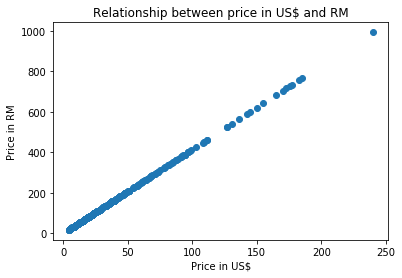

In [0]:
#scatter plot for price before and after data cleaning
plt.scatter(df_frame['Price'],df_new['Price (RM)'])
plt.xlabel('Price in US$')
plt.ylabel('Price in RM')
plt.title('Relationship between price in US$ and RM')
plt.show()

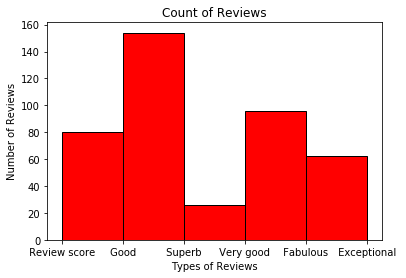

In [0]:
#review before data cleaning
plt.hist(df_frame['Reviews'],
         facecolor = 'red',
         edgecolor = 'black',
         bins = 5
         )
plt.title('Count of Reviews')
plt.xlabel('Types of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

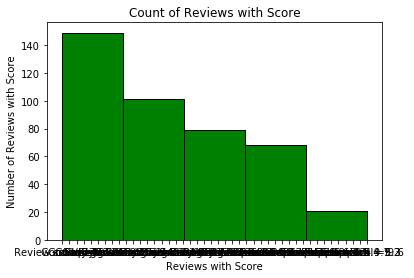

In [0]:
#review and score after data cleaning
plt.hist(df_data['combine'],
         facecolor = 'green',
         edgecolor = 'black',
         bins = 5
         )
plt.title('Count of Reviews with Score')
plt.xlabel('Reviews with Score')
plt.ylabel('Number of Reviews with Score')
plt.show()

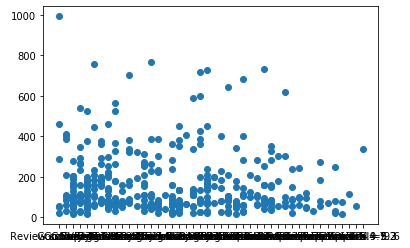

In [0]:
#scatter plot for attribute price and review with score(after cleaning)
plt.scatter(df_data['combine'],df_new['Price (RM)'])

plt.show()